<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Agrupamento
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agrupamento;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins

Neste exercício, vamos utilizar uma base de dados com informações sobre flores do gênero iris. A idéia é agrupar as flores de acordo com suas características físicas (variáveis preditivas). Lembre-se das aulas, nós já temos uma idéia dos agrupamentos.

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')
iris = iris.drop(['species'], axis=1)

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### **1.1. Analise exploratoria**

Utilize os gráficos abaixo para entender melhor a relação entre os atributos da base de dados. Comente o que observou no gráfico.

 - Atributos preditivos:

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

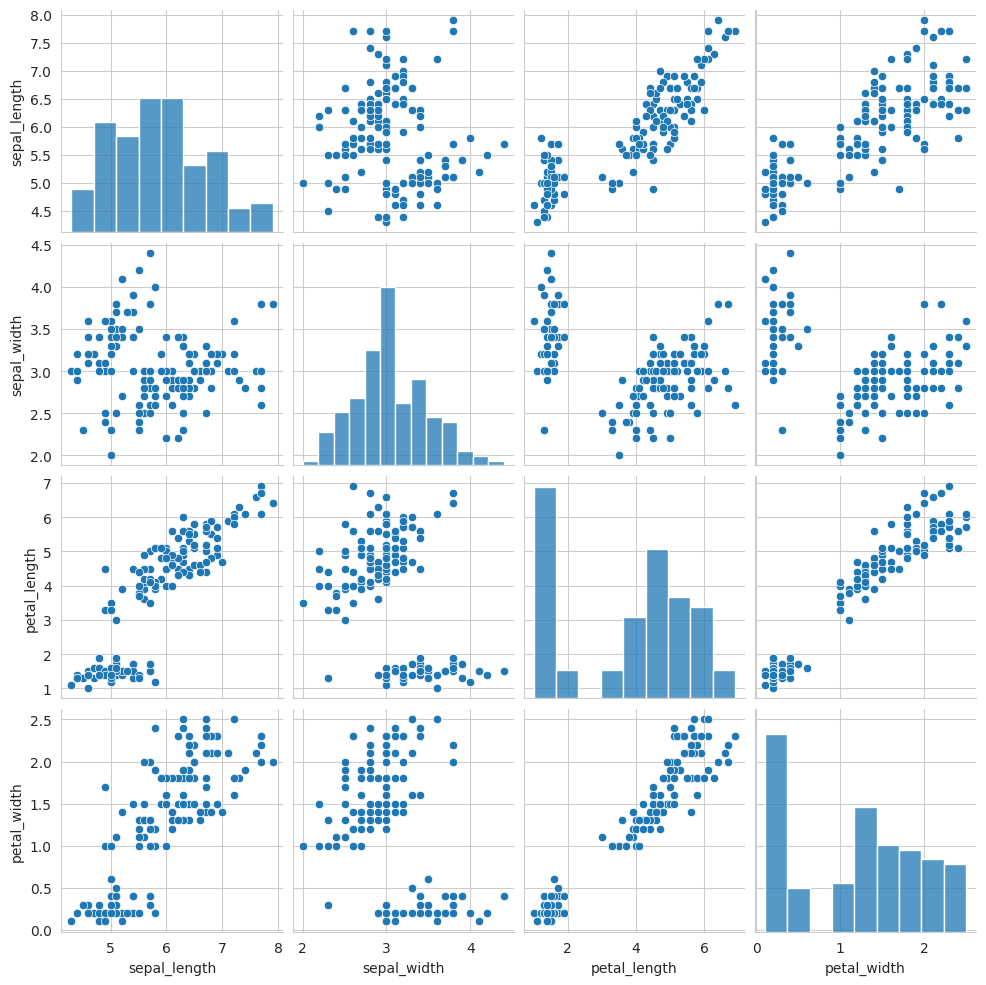

In [4]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=iris, palette="pastel")

**Comentário:** ?
* Podemos ver pelos graficos que temos algumas opções  para clusterização, temos grupos  quem tem:
* Baixo **petal_length** e baixo **petal_width**
* Alto **petal_length** e alto **petal_width**
Agora o grupos que tem alto **sepal_length** e baixo **sepal_length** e **sepal_width** não estão separadamentes claros, é como se abranjasem um unico grupo, podendo ser preciso tratar melhor os dados.

## 2\. Dados

### **2.1. Valores nulos**

Avalie se a base de dados possui valores faltantes, se sim, utilize os conceitos da aula para trata-los.

In [5]:
# resposta da questão 2.1
iris.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0


* **COMENTÁRIO**
* A base de dados não possui valores faltantes

### **2.2. Variáveis numéricas**

Identifique se existe a necessidade de escalar as variáveis numéricas. Se sim, crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

> **Nota**: Você não deve tratar a variável resposta.

In [6]:
# resposta da questão 2.2
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


* **COMENTÁRIO**
* Não é necessário escalar as variáveis numéricas, todas as colunas tem suas variáveis numéricas

### **2.3. Limpeza**

Caso você tenha escalado suas variáveis, descarte as colunas originais e mantenha apenas as variáveis preditivas com o sufixo *_std*", *_nom*" e "*_ord*".

In [ ]:
# resposta da questão 2.3

## 3\. Modelagem

### **3.1. Treino**

Treine 10 modelos de **k-médias** variando o número de clusters de 1 a 10. Para cada modelo treinado, salve o valor global do **wcss** em uma lista.

In [7]:
from sklearn.cluster import KMeans

In [8]:
# resposta da questão 3.1
wcss = []
for k in range(1,11):
    modelo = KMeans(n_clusters=k) #--Dentro de cada iteração do loop, cria uma nova instância do modelo k-means
    modelo = modelo.fit(iris)  #--Treina o modelo K-means aos dados, tentado encontrar os clusters ideais
    wcss.append(modelo.inertia_) #--Após o K-Means ser treinado para um determinado k, esta linha adiciona o valor de WCSS calculado pelo modelo à  lista wcss.

### **3.2. Avaliação**

Gere um gráfico de linha dos valores do **wcss** pelo **número de clusters**. Utilize o método do cotovelo para decidir o número final de clusters.

In [9]:
clusters = modelo.labels_
clusters = pd.DataFrame(clusters, columns=['cluster'])
iris_clustered = pd.concat([iris, clusters], axis=1)
iris_clustered.tail()

,sepal_length,sepal_width,petal_length,petal_width,cluster
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,8
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3
149,5.9,3.0,5.1,1.8,8


* **COMENTÁRIO**
* esse código pega os dados dos clusters criados na variável (modelo) do código anterior onde criamos a lista **wcss**, com esses dados obtidos criamos um novo DataFrame chamado **clusters**, que tem uma unica coluna chamada **cluster**.
* Depois combinamos o Dataframe original (**iris**) com o novo DataFrame (**clusters**) através da função pd.concat para criar o DataFrame **iris_clustered** e imprimos as suas  5 ultimas linhas.

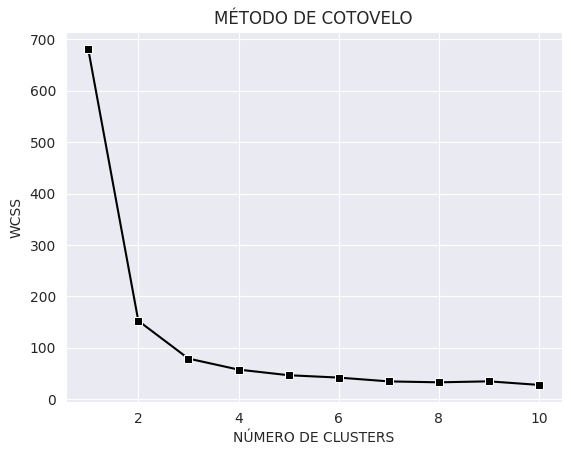

In [10]:
# resposta da questão 3.2
with sns.axes_style('darkgrid'):
  grafico = sns.lineplot(x=range(1,11), y=wcss, marker='s', color='k')
  grafico.set(title='MÉTODO DE COTOVELO', xlabel='NÚMERO DE CLUSTERS', ylabel='WCSS')

* **2 CLUSTERS**

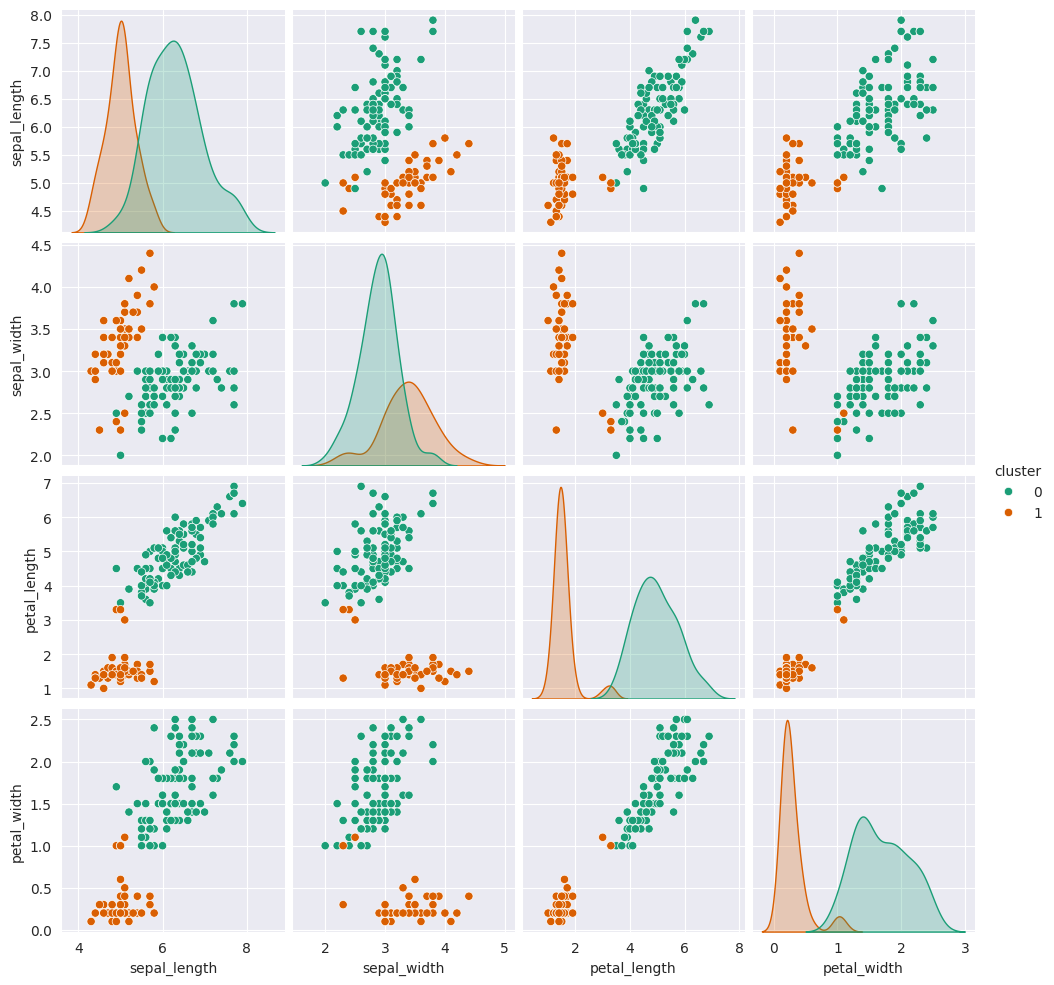

In [11]:
model_2k = KMeans(n_clusters=2)
model_2k = model_2k.fit(iris)

clusters = model_2k.labels_
iris_clustered_2k = pd.concat([iris, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

with sns.axes_style('darkgrid'):
  grafico = sns.pairplot(data=iris_clustered_2k, hue='cluster', palette='Dark2')


* **comentário**
*  o cluster laranja (0) provavelmente representa a espécie Iris setosa, que é conhecida por ter pétalas distintamente menores. O cluster verde (1) representaria uma combinação de Iris versicolor e Iris virginica, que são mais difíceis de separar apenas com as características de sépala, mas aqui estão agrupadas como um único cluster maior.

* **3 CLUSTERS**

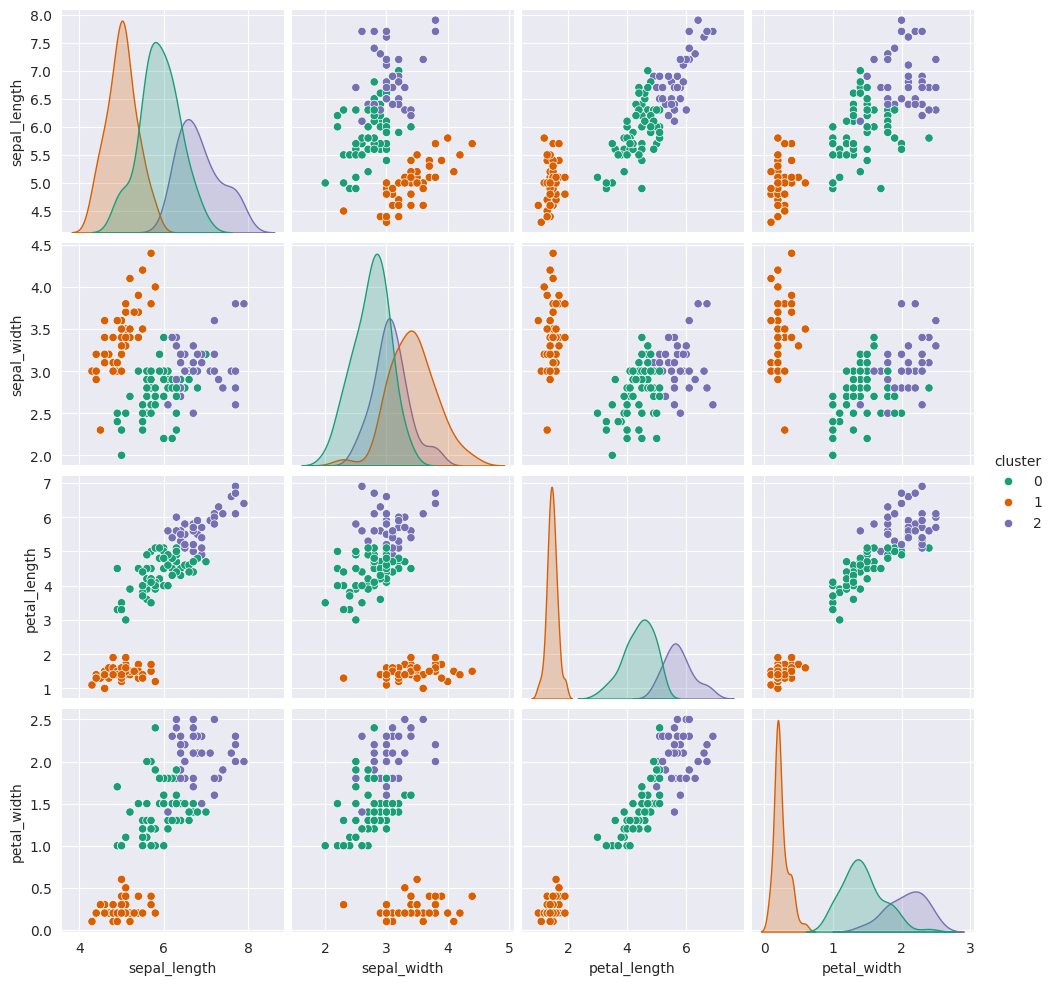

In [14]:
model_3k = KMeans(n_clusters=3)
model_3k = model_3k.fit(iris)

clusters = model_3k.labels_
iris_clustered_3k = pd.concat([iris, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

with sns.axes_style('darkgrid'):

  grafico = sns.pairplot(data=iris_clustered_3k, hue='cluster', palette="Dark2")

* **COMENTARIO**
* Este gráfico com 3 clusters demonstra uma excelente separação baseada nas características das flores, o que é típico para o famoso conjunto de dados Iris, que possui 3 espécies distintas.

* Cluster Laranja (0): É um cluster extremamente bem definido e separado dos outros dois. É caracterizado por ter pétalas muito pequenas (tanto em comprimento quanto em largura) e, curiosamente, frequentemente maiores sepal_width. Este cluster corresponde quase certamente à espécie Iris setosa.

* Cluster Verde (1): Este cluster ocupa uma região intermediária. Possui pétalas de tamanho médio e valores intermediários para as sépalas. Corresponde provavelmente à espécie Iris versicolor.

* Cluster Roxo (2): Este cluster é caracterizado por ter pétalas grandes (as maiores entre os três clusters) e, em geral, sépalas maiores (especialmente sepal_length). Corresponde provavelmente à espécie Iris virginica.

* As variáveis petal_length e petal_width são, de longe, as mais importantes para distinguir os três clusters, especialmente para isolar o cluster 0. A separação entre os clusters 1 e 2 é também bastante boa nessas dimensões, mas ligeiramente menos nítida do que a separação do cluster 0. As variáveis de sépala são menos eficazes para separar os clusters 1 e 2.
* O algoritmo de clusterização foi muito bem-sucedido em identificar três grupos distintos e biologicamente significativos, com as dimensões da pétala sendo as características mais discriminatórias.

* **4 CLUSTERS**

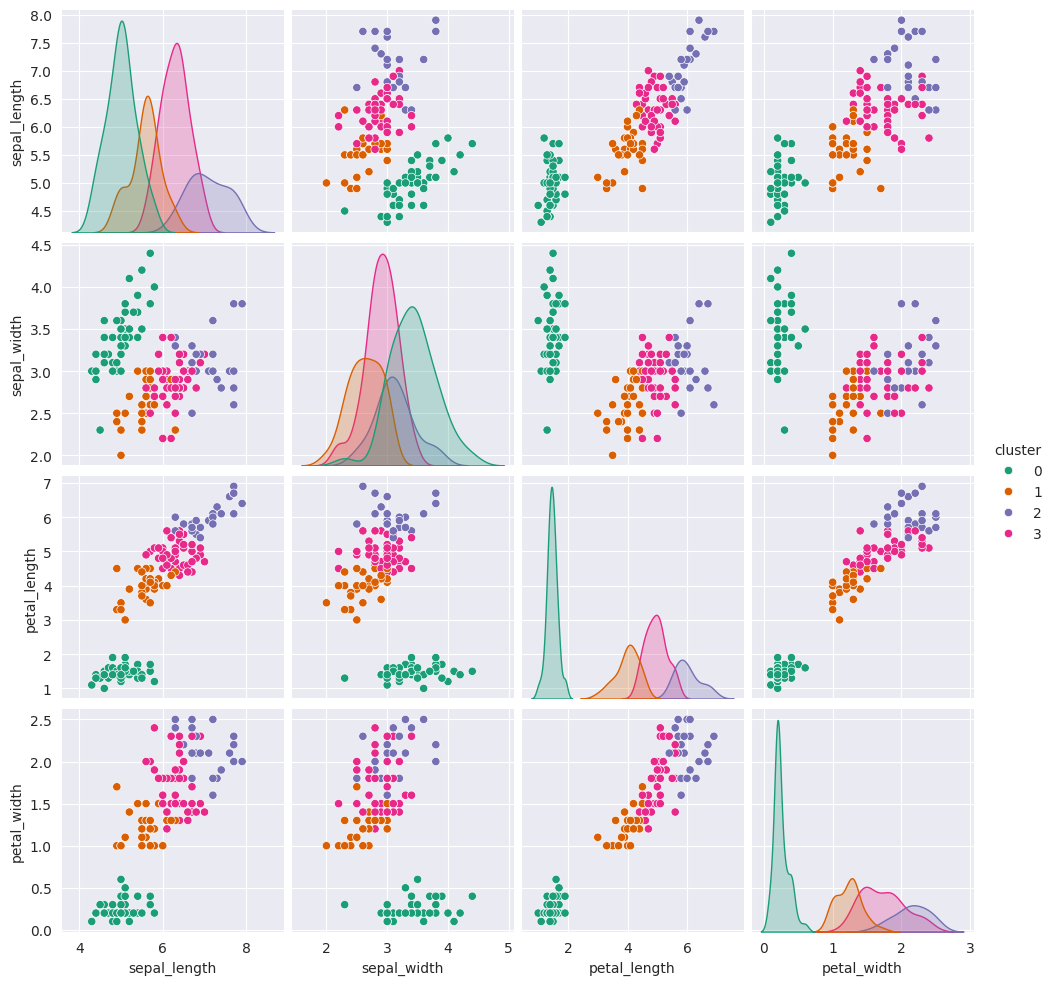

In [15]:
model_4k = KMeans(n_clusters=4)
model_4k = model_4k.fit(iris)

clusters = model_4k.labels_
iris_clustered_4k = pd.concat([iris, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

with sns.axes_style('darkgrid'):

  grafico = sns.pairplot(data=iris_clustered_4k, hue='cluster', palette="Dark2")

* **COMENTÁRIO**

* O Cluster Verde (0) é extremamente distinto e isolado dos demais. Ele é caracterizado por ter pétalas minúsculas (tanto em comprimento quanto em largura) e, em geral, sépalas menores. Este cluster corresponde perfeitamente à espécie Iris setosa.
* Os outros três clusters (Laranja 1, Roxo 2, Rosa-Choque 3) representam uma tentativa de dividir as outras duas espécies de Iris (Iris versicolor e Iris virginica) em grupos mais granulares.
* Há uma progressão nos tamanhos de pétala e, em menor grau, sépala entre esses três clusters: o Laranja (1) geralmente tem as menores pétalas, o Rosa-Choque (3) tem pétalas intermediárias, e o Roxo (2) tem as maiores pétalas.
* No entanto, a separação entre os clusters Laranja (1), Roxo (2) e Rosa-Choque (3) não é tão limpa ou natural quanto a separação do cluster Verde (0). Há significativa sobreposição entre eles, especialmente em variáveis de sépalas, indicando que forçar 4 clusters neste conjunto de dados pode levar a uma divisão artificial dentro de grupos que são intrinsecamente mais contínuos ou misturados.

* **CONCLUSÃO**
* O agrupamento por 3 clusters teve uma melhor concepção clara dos dados dos atributos de cada espécie da flor **íris**, os separando fazendo uma melhor indentificação das 3 espécie distintas (**setosa, versicolor, virginica**)

### **3.3. Visualização**

**a)** Utilizando o número de clusters final, adicione uma coluna chamada **cluster** no dataframe **iris** com o número do cluster que cada flor foi alocada.

In [20]:
# resposta da questão 3.3.a
model = KMeans(n_clusters=3)
model = model_3k.fit(iris)

clusters = model.labels_
iris_clustered = pd.concat([iris, pd.DataFrame(clusters, columns=['Cluster'])], axis=1)
iris_clustered.tail()

,sepal_length,sepal_width,petal_length,petal_width,Cluster
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1
149,5.9,3.0,5.1,1.8,2


**b)** Gere a mesma visualização da sessão 1.1, agora passando como atributo **hue** a coluna **cluster**. Comente os resultados com base no valor esperado do número de clusters.

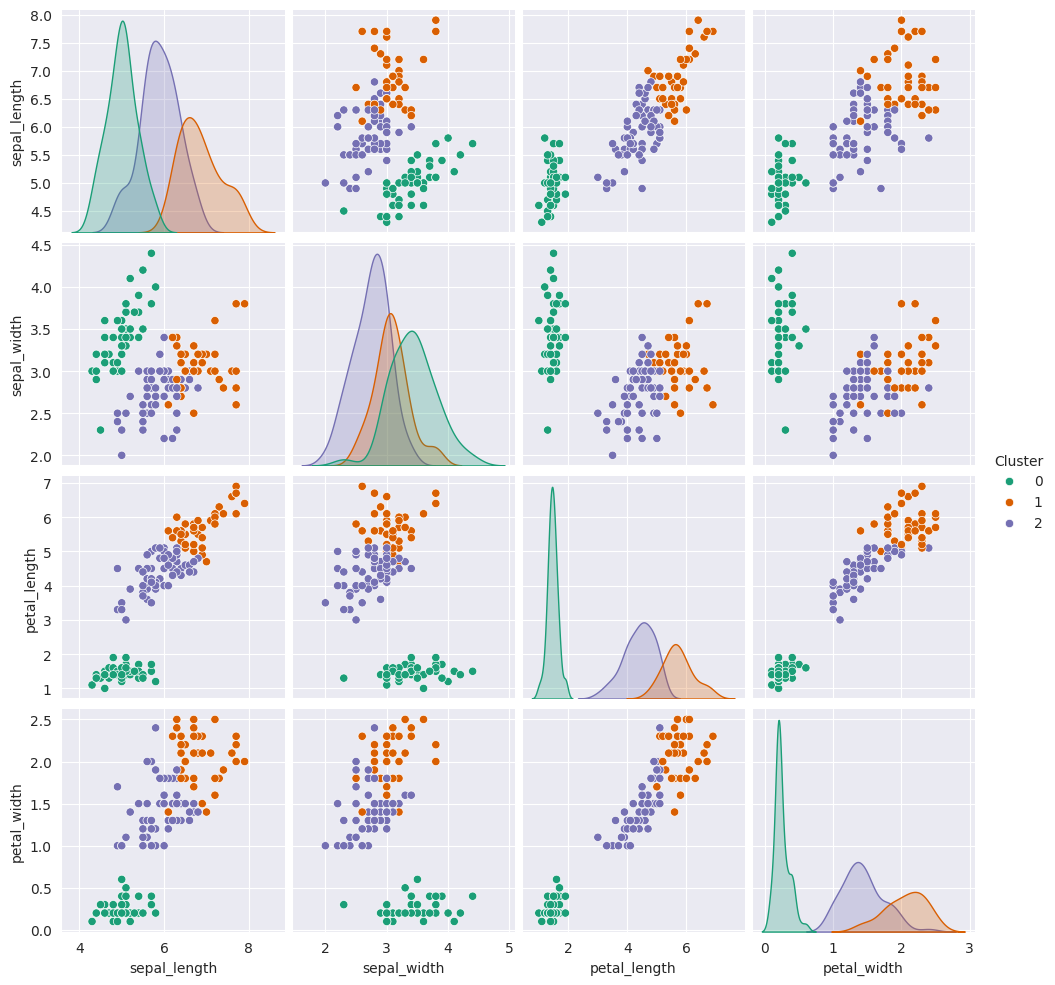

In [21]:
# resposta da questão 3.3.b
with sns.axes_style('darkgrid'):
  grafico = sns.pairplot(data = iris_clustered, hue = 'Cluster', palette = 'Dark2')

**Comentário:** ?
*  A clusterização foi bem-sucedida em identificar os três grupos naturais presentes neste conjunto de dados. A distinção do Cluster Verde (0) é excelente, enquanto os Clusters Laranja (1) e Roxo (2) mostram uma separação razoável, mas com a sobreposição esperada para essas duas espécies, que são morfologicamente mais similares entre si. As dimensões da pétala continuam sendo as características mais discriminatórias.

## 4\. Predição  

### **4.1. Nova flor**

Em qual cluster a flor abaixo seria alocada?


| sepal_length	| sepal_width | petal_length | petal_width |
| --- | --- | --- | --- |
| 5.1 | 3.5 | 1.4 | 0.2 |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2.

In [41]:
iris_clustered_3k.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [40]:
# resposta da questão 4.1
nova_flor = np.array([5.1, 3.5, 1.4, 0.2])
cluster_nova_flor = model_3k.predict(nova_flor.reshape(1, -1))
print(f'A nova flor foi alocada no cluster {cluster_nova_flor}')

A nova flor foi alocada no cluster [0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


* **COMENTÁRIO**
* A nova flor foi a alocada no cluster 0 **verde** do nosso gráfico, ou seja o cluster número (1) no nosso DataFrame, ela possui menor valor para o **petal width** que os demais e o seu **sepal width** está mais distribuído entre 3-4 mm.

---